In [43]:
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas  # For hvplot functionality
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




In [44]:
industry_df = pd.read_excel('/Users/henrykern/Desktop/School/Class Notes/Fall Semester 2024/Big Data Algorithms/HW/Final/project_data/2023-33/industry.xlsx', sheet_name = 11, header = 1)

In [45]:
industry_df.head()

,2023 National Employment Matrix title,2023 National Employment Matrix code,Industry type,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Compound annual rate of change, employment, 2023–33","Output, 2023[1][2]","Output, 2033[1][2]","Compound annual rate of change, output, 2023–33"
0,Total employment,TE1000,Summary,167849.8,174589,6739.2,4,0.4,38771.3,46879.3,1.9
1,Self-employed workers,TE1100,Line item,9708.9,9828.8,119.9,1.2,0.1,–,–,–
2,Total wage and salary employment,TE1200,Summary,158140.9,164760.3,6619.3,4.2,0.4,–,–,–
3,"Agriculture, forestry, fishing and hunting",110000,Summary,1461.8,1473,11.2,0.8,0.1,443.6,509.7,1.4
4,Crop production,111000,Line item,849.3,874.4,25.1,3,0.3,171,192.7,1.2


In [46]:
industry_df.head()

,2023 National Employment Matrix title,2023 National Employment Matrix code,Industry type,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Compound annual rate of change, employment, 2023–33","Output, 2023[1][2]","Output, 2033[1][2]","Compound annual rate of change, output, 2023–33"
0,Total employment,TE1000,Summary,167849.8,174589,6739.2,4,0.4,38771.3,46879.3,1.9
1,Self-employed workers,TE1100,Line item,9708.9,9828.8,119.9,1.2,0.1,–,–,–
2,Total wage and salary employment,TE1200,Summary,158140.9,164760.3,6619.3,4.2,0.4,–,–,–
3,"Agriculture, forestry, fishing and hunting",110000,Summary,1461.8,1473,11.2,0.8,0.1,443.6,509.7,1.4
4,Crop production,111000,Line item,849.3,874.4,25.1,3,0.3,171,192.7,1.2


In [47]:
industry_df = industry_df.drop(columns = ["Industry type","Output, 2023[1][2]","Output, 2033[1][2]","Compound annual rate of change, output, 2023–33"])

In [48]:
industry_df.head()

,2023 National Employment Matrix title,2023 National Employment Matrix code,"Employment, 2023","Employment, 2033","Employment change, numeric, 2023–33","Employment change, percent, 2023–33","Compound annual rate of change, employment, 2023–33"
0,Total employment,TE1000,167849.8,174589,6739.2,4,0.4
1,Self-employed workers,TE1100,9708.9,9828.8,119.9,1.2,0.1
2,Total wage and salary employment,TE1200,158140.9,164760.3,6619.3,4.2,0.4
3,"Agriculture, forestry, fishing and hunting",110000,1461.8,1473,11.2,0.8,0.1
4,Crop production,111000,849.3,874.4,25.1,3,0.3


In [49]:
industry_df = industry_df.rename(columns = {"Employment, 2023":"2023 Employment","Employment, 2033":"2033 Employment","2023 National Employment Matrix title":"Industry","2023 National Employment Matrix code":"Code","Employment change, numeric, 2023–33":"Prediction Numeric Change","Employment change, percent, 2023–33":"Prediction Percent Change","Compound annual rate of change, employment, 2023–33":"Prediction Annual Rate of Change"})

In [50]:
industry_df = industry_df.drop_duplicates(subset='Industry', keep='first') #gets rid of dups

industry_df = industry_df.drop(industry_df.tail(5).index) #drops the footnotes


industry_df.tail()

,Industry,Code,2023 Employment,2033 Employment,Prediction Numeric Change,Prediction Percent Change,Prediction Annual Rate of Change
419,Postal service,491000,604.3,580,-24.3,-4,-0.4
420,"Federal government, excluding postal s...",999100,2320.8,2350.2,29.4,1.3,0.1
421,"State and local government, excluding ed...",9992-3,8187.4,8350.6,163.2,2,0.2
422,"State government, excluding education ...",999200,2296.1,2321.5,25.4,1.1,0.1
423,"Local government, excluding education ...",999300,5891.3,6029.2,137.9,2.3,0.2


In [51]:


# reshaping the dataframe
industry_melted = pd.melt(industry_df, id_vars=['Industry'], value_vars=['2023 Employment', '2033 Employment'],
                          var_name='Year', value_name='Employment')

# multiSelect widget for selecting Industry
Industry_selector = pn.widgets.MultiSelect(
    name='Industry',
    options=industry_df['Industry'].unique().tolist()
)

# function to plot data based on selected Industrys
def plot_my_data(Industrys):
    # Filter the data based on the selected Industrys
    filtered_data = industry_melted[industry_melted['Industry'].isin(Industrys)]
    
    
    plot = filtered_data.hvplot.barh(
        x='Industry',
        y='Employment',
        by='Year',  # use the year to differentiate the bars for 2023 and 2033
        hover_cols=['Industry', 'Employment'],
        width=1500,
        color='Year',  # color bar on year
        cmap='Set1'  
    ).opts(
        title='Employment in 2023 and 2033 by Industry',
        show_grid=True,
        framewise=True
    )
    
    
    return plot


interactive_plot = pn.bind(plot_my_data, Industrys=Industry_selector)

layout = pn.Column(Industry_selector, interactive_plot)

# displays plot
layout.show()


Launching server at http://localhost:56686


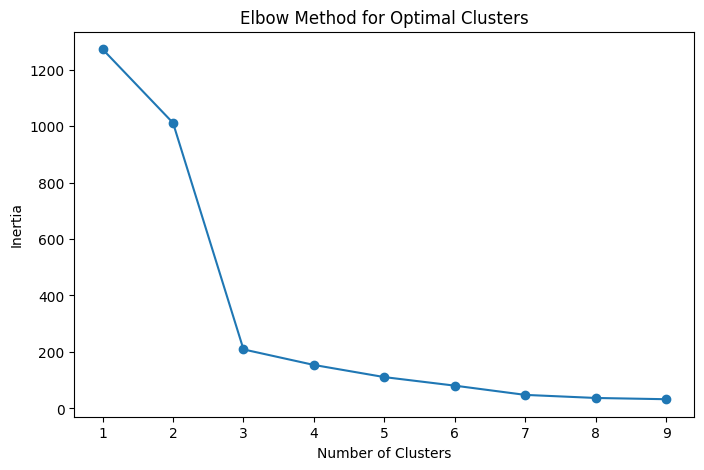

In [52]:

# Select relevant columns for clustering
data_for_clustering = industry_df[['2023 Employment', '2033 Employment', 'Prediction Percent Change']].dropna()

# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# find the elbow for best visualization of the optimal amount of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# plotting the elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()



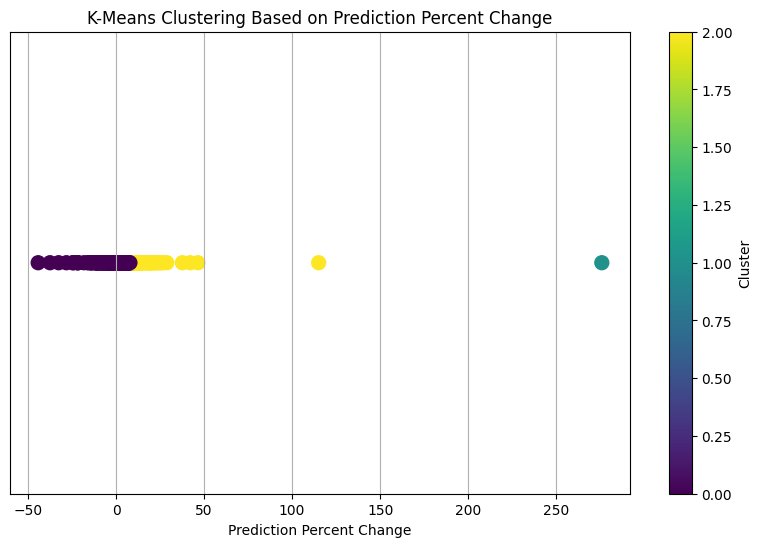

In [53]:


# we will only use the 'Prediction Percent Change' for clustering
X = industry_df[['Prediction Percent Change']].values

#standardize data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Using 3 clusters
industry_df['Cluster'] = kmeans.fit_predict(X_scaled)

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(industry_df['Prediction Percent Change'], np.zeros_like(industry_df['Prediction Percent Change']), 
            c=industry_df['Cluster'], cmap='viridis', s=100)


plt.title('K-Means Clustering Based on Prediction Percent Change')
plt.xlabel('Prediction Percent Change')
plt.yticks([])  # Hide the y-axis, since we're only showing 1D data
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()




In [ ]:
Based on the graph above we can see the three clusters.The first two clusters have the majority of the industies while 
the third cluster only has the one outliner